# Spam Detection Project
## Machine learning nano-degree Capstone project
### Yosef Hesham Nwear

## 1- Import libraries load the data

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from collections import Counter

%matplotlib inline 

# load data set for csv file 
data=pd.read_csv('SMSSpamCollection.csv',encoding='latin-1',usecols=[0,1])

In [6]:
print(data.head(),'\n')
print(data.info(),'\n')
print(data.describe())

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro... 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
v1    5572 non-null object
v2    5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB
None 

          v1                      v2
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30


In [7]:
data.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

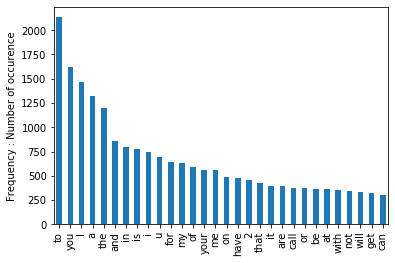

In [8]:
# Visualization of the most freq words in the dataset 
cunt1=Counter(" ".join(data['v2']).split()).most_common(30)
df1 =pd.DataFrame.from_dict(cunt1)
df1=df1.rename(columns={0:'word',1:'count'})
fig=plt.figure()
ax=fig.add_subplot()
df1.plot.bar(ax=ax,legend=False)
xticks = np.arange(len(df1['word']))
ax.set_xticks(xticks)
ax.set_xticklabels(df1['word'])
ax.set_ylabel('Frequency : Number of occurence')
plt.show()

In [9]:
# Count the number of words in each Text
data['Count']=0
for i in np.arange(0,len(data.v2)):
    data.loc[i,'Count'] = len(data.loc[i,'v2'])

print(data.head(),'\n')

# Unique values in target set
print ("Unique values in the Class set: ", data['v1'].unique())

     v1                                                 v2  Count
0   ham  Go until jurong point, crazy.. Available only ...    111
1   ham                      Ok lar... Joking wif u oni...     29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...    155
3   ham  U dun say so early hor... U c already then say...     49
4   ham  Nah I don't think he goes to usf, he lives aro...     61 

Unique values in the Class set:  ['ham' 'spam']


In [10]:
data=data.replace(['ham','spam'],[0,1])

In [11]:
# Collecting ham messages 
ham=data[data.v1==0]
ham_count  = pd.DataFrame(pd.value_counts(ham['Count'],sort=True).sort_index())
print ("Number of ham messages in data set :", ham['v1'].count(),'\n')
print ("Ham Count value :", ham_count['Count'].count(),'\n')
print(ham.head())

Number of ham messages in data set : 4825 

Ham Count value : 272 

   v1                                                 v2  Count
0   0  Go until jurong point, crazy.. Available only ...    111
1   0                      Ok lar... Joking wif u oni...     29
3   0  U dun say so early hor... U c already then say...     49
4   0  Nah I don't think he goes to usf, he lives aro...     61
6   0  Even my brother is not like to speak with me. ...     77


In [12]:
# Collecting spam messages
spam=data[data.v1 == 1]
spam_count=pd.DataFrame(pd.value_counts(spam['Count'],sort=True).sort_index())
print("Number of spam messages in data set :" ,spam['v1'].count(),'\n')
print("Spam count value :",spam_count['Count'].count(),'\n')
print(spam.head())

Number of spam messages in data set : 747 

Spam count value : 122 

    v1                                                 v2  Count
2    1  Free entry in 2 a wkly comp to win FA Cup fina...    155
5    1  FreeMsg Hey there darling it's been 3 week's n...    148
8    1  WINNER!! As a valued network customer you have...    158
9    1  Had your mobile 11 months or more? U R entitle...    154
11   1  SIX chances to win CASH! From 100 to 20,000 po...    136


## 2- Preprocess the data

In [13]:
from sklearn.preprocessing import LabelEncoder

labels=data['v1']

#convert class labels to binary values spam : 1 , ham : 0

encoder=LabelEncoder()
Y=encoder.fit_transform(labels)

print(Y[:10])

[0 0 1 0 0 1 0 0 1 1]


In [14]:
# collecting text messages to clear and deal with it 

text_messages=data['v2']

In [15]:
# clear text data using reguler expressions

# Replace email addresses with 'email'
processed = text_messages.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
processed = processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
processed = processed.str.replace(r'£|\$', 'moneysymb')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
processed = processed.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumbr')
    
# Replace numbers with 'numbr'
processed = processed.str.replace(r'\d+(\.\d+)?', 'numbr')

In [16]:
# Remove punctuation
processed = processed.str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
processed = processed.str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
processed = processed.str.replace(r'^\s+|\s+?$', '')

In [17]:
# change capital words  to lower case 

processed=processed.str.lower()
processed.head()

0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in numbr a wkly comp to win fa cup ...
3          u dun say so early hor u c already then say
4    nah i don t think he goes to usf he lives arou...
Name: v2, dtype: object

In [ ]:
# use NLP toolkit "NLTK"

import nltk
nltk.download('stopwords')

In [19]:
# Cleaning data from stop words

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#if true it will download all the stopwords
if False:
    nltk.download('stopwords')

#if true will create vectorizer without any stopwords
if False:
    vectorizer = TfidfVectorizer()

#if true will create vectorizer with stopwords
if True:
    stopset = set(stopwords.words("english"))
    vectorizer = TfidfVectorizer(stop_words=stopset,binary=True)

In [20]:
# Extract feature column 'Text'
X=vectorizer.fit_transform(processed)
# Extract target column 'label'
y=data['v1']

## 3- Prediction

In [21]:
# split data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [22]:
print(X_train.shape[0])
print(y_test.shape[0])

4179
1393


In [33]:
# use models  form sklearn to predict

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

objects=( 'DTs', 'LOgisticRegression','Multi-NB', 'SVM','KNN')

In [34]:
# Training and predicting 

# function to train model
def train_classifier(clf, X_train, y_train):    
    clf.fit(X_train, y_train)
    
# function to predict features 
def predict_labels(clf, features):
    return (clf.predict(features))

In [35]:
# initialize Classifiers
DecisionTree = DecisionTreeClassifier(random_state=42)
LogisticRegression= LogisticRegression()
NaiveBayse = MultinomialNB(alpha=1.0,fit_prior=True)
SVC = SVC(kernel = 'linear')
KNeighborsClassifier=KNeighborsClassifier(n_neighbors=100)


clf = [DecisionTree,LogisticRegression,NaiveBayse,SVC,KNeighborsClassifier]
names =['DecisionTree','LogisticRegression','NaiveBayse','SVC','KNN']
scores=[]
for j in range(0,5):
    scores.append(cross_val_score(clf[j], X_train, y_train, cv=5))
    print ("{} : {}".format(names[j],scores[j]))

DecisionTree : [0.97013142 0.97966507 0.98086124 0.96646707 0.96886228]
LogisticRegression : [0.96415771 0.96889952 0.95933014 0.95329341 0.95808383]
NaiveBayse : [0.96774194 0.96650718 0.95813397 0.96287425 0.96047904]


/home/bahaa/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


SVC : [0.98446834 0.98684211 0.98086124 0.98443114 0.97724551]
KNN : [0.95937873 0.94736842 0.93899522 0.95449102 0.95329341]


In [36]:
# train & predict models and calculate the F1 Score 
pred_val = [0,0,0,0,0]

for a in range(0,5):
    train_classifier(clf[a], X_train, y_train)
    y_pred = predict_labels(clf[a],X_test)
    pred_val[a] = f1_score(y_test, y_pred,  average='binary') 
    print ("{} Accuracy: {}".format(names[a],pred_val[a]))

DecisionTree Accuracy: 0.9157894736842104
LogisticRegression Accuracy: 0.8134556574923548
NaiveBayse Accuracy: 0.8605341246290802


/home/bahaa/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


SVC Accuracy: 0.9192200557103063
KNN Accuracy: 0.7483870967741935


In [37]:
# Calculate ROC Score

pred_val2=[0,0,0,0,0]

for i in range(0,5):
    train_classifier(clf[i], X_train, y_train)
    y_predx=predict_labels(clf[i], X_test)
    pred_val2[i] = roc_auc_score(y_test,y_predx)
    print ("{} Accuracy: {}".format(names[i],pred_val2[i]))

DecisionTree Accuracy: 0.9492577815333955
LogisticRegression Accuracy: 0.8469196191339042
NaiveBayse Accuracy: 0.879165178454757


/home/bahaa/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


SVC Accuracy: 0.9306892526417576
KNN Accuracy: 0.8024170013328571


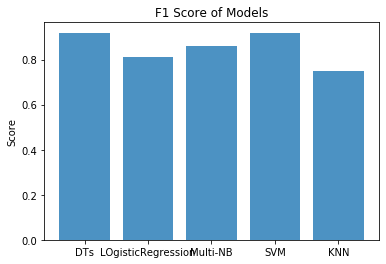

In [38]:
# ploating data for F1 Score
y_pos = np.arange(len(objects))
y_val = [ x for x in pred_val]
plt.bar(y_pos,y_val, align='center', alpha=0.8)
plt.xticks(y_pos, objects)
plt.ylabel( 'Score')
plt.title('F1 Score of Models')
plt.show()

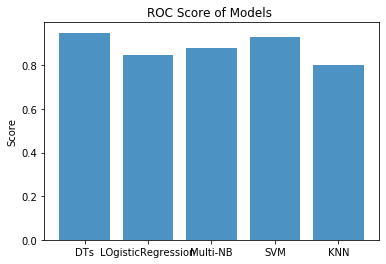

In [39]:
# ploating data for ROC score 
y_pos2=np.arange(len(objects))
y_val2=[i for i in pred_val2]
plt.bar(y_pos2,y_val2,align='center',alpha=0.8)
plt.xticks(y_pos2,objects)
plt.ylabel('Score')
plt.title('ROC Score of Models ')
plt.show()

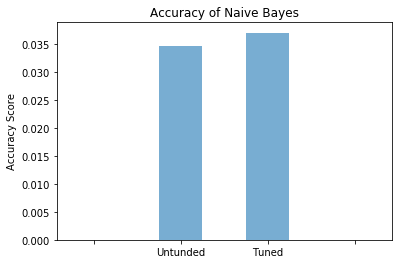

In [40]:
# ploating data for Accuracy Score
# ploating data for Accuracy of Models between 1.00 - 0.90 for better visualization
objects = ('','Untunded', 'Tuned','')
y_pos = np.arange(4)
y_val = [0,0.03470790378,0.037062937063,0 ]
plt.bar(y_pos,y_val, align='center',width = 0.5, alpha=0.6)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Naive Bayes')
plt.show()

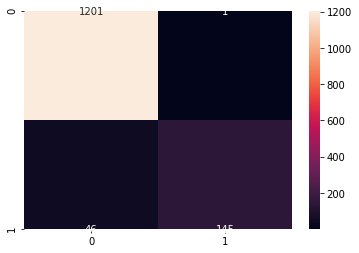

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline
best_clf=NaiveBayse
pred = best_clf.predict(X_test)
sns.heatmap(confusion_matrix(y_test, pred), annot = True, fmt = '')

## Thanks